<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Recomendando Música

El objetivo de este caso-taller es construir un sistema de recomendación de Música utilizando los datos de [Last.fm](https://www.last.fm/) provistos  abiertamente por [grouplens](https://grouplens.org/about/what-is-grouplens/) para: **"avanzar la teoría y la práctica de la computación social mediante la construcción y la comprensión de sistemas *(de recomendación)* utilizados por personas reales".**

Los datos contienen información sobre artistas, usuarios, y las veces que estos escucharon sus canciones. Las bases se encuentran en los `Archivos de Laboratorio` en la carpeta `data`, allí también está disponible un archivo [README](data/readme.txt) que contiene más información sobre las bases.


## Instrucciones generales

1. Para desarrollar el *cuaderno*, primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "Revisión por el compañero".

4. El archivo entregado debe poder ser ejecutado localmente por los pares. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

### 1. Carga de datos 

En la carpeta `data` se encuentran los archivos:

   - `artists.dat`  que contienen el identificador del artista (`id`), nombre (`name`), link a la página del artista en last.fm (`url`), y link a la imagen del usuario (`pictureURL`), vale aclarar que varios de estos links están rotos. 
   - `user_artists.dat`  que contiene identificador del usuario (`userID`), nombre del artista que escuchó (`artistID`), y las veces que los escuchó (`weight`).

Cargue estos datos en su *cuaderno*:

   1. Para la base de artistas seleccione las columnas de identificador de artista (`id`) y nombre (`name`). Renombre estas columnas para poder hacer la unión con la base `user_artists.dat`.
   2. Para la base de usuarios y artistas, renombre las columnas de forma tal que se mantenga la consistencia para unir con la base anterior, y renombre la columna `weight` a `nro_reproducciones`.
   3. Una estas bases.
   

In [2]:
artists_df = pd.read_csv('./data/artists.dat', sep='\t')
user_artists_df = pd.read_csv('./data/user_artists.dat', sep='\t')

In [3]:
artists_df = artists_df[['id', 'name']].rename(columns={'id': 'artistID', 'name': 'artist_name'})
user_artists_df = user_artists_df.rename(columns={'artistID': 'artistID', 'userID': 'userID', 'weight': 'nro_reproducciones'})

In [4]:
dataset = pd.merge(user_artists_df, artists_df, on='artistID', how='inner')
print(dataset.columns)

Index(['userID', 'artistID', 'nro_reproducciones', 'artist_name'], dtype='object')


Se cargan las bases de datos de la carpeta data, se renombran las columnas según las instrucciones y luego se crea una base de datos a partir de la unión de ambas

### 2. Análisis preliminar. 

En esta sección exploraremos la base. Para ello responda las siguientes preguntas.

#### 2.1 ¿Cuantos usuarios y artistas hay en la base?

In [5]:
# Contar usuarios y artistas
num_users = dataset['userID'].nunique()
num_artists = dataset['artistID'].nunique()

print(f'Número de usuarios: {num_users}\nNúmero de artistas: {num_artists}')

Número de usuarios: 1892
Número de artistas: 17632



#### 2.2 ¿Cuáles es la distribución de probabilidad del consumo por artista? (haga el calculo sin ponderar y ponderando por el numero de reproducciones) ¿Qué podemos inferir a partir de la comparación de ambas?

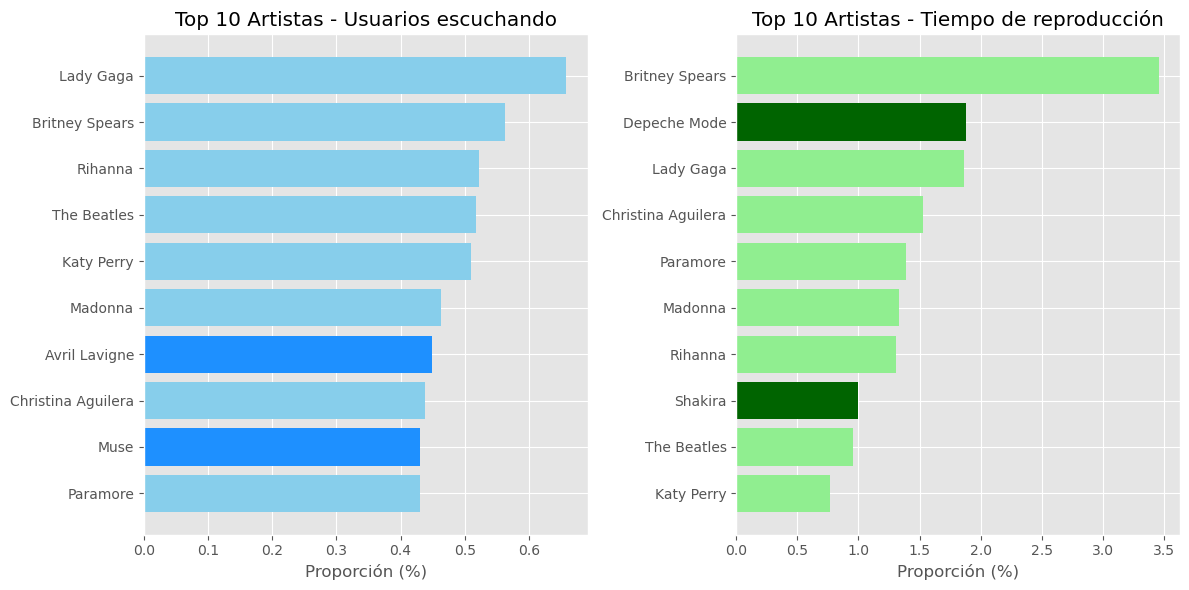

In [6]:
# Distribución de probabilidad sin ponderar
artist_count = dataset['artist_name'].value_counts(normalize=True).sort_values(ascending=False) * 100

# Distribución de probabilidad ponderada por el número de reproducciones
artist_weighted_counts = dataset.groupby('artist_name')['nro_reproducciones'].sum()
artist_weighted_distribution = artist_weighted_counts / artist_weighted_counts.sum() * 100

# Obtener los 10 artistas más populares en ambas distribuciones
top_10_unweighted = artist_count.head(10)
top_10_weighted = artist_weighted_distribution.sort_values(ascending=False).head(10)

only_in_unweighted = top_10_unweighted.index.difference(top_10_weighted.index)
only_in_weighted = top_10_weighted.index.difference(top_10_unweighted.index)

# Gráfica
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
colors = ['dodgerblue' if artist in only_in_unweighted else 'skyblue' for artist in top_10_unweighted.index]
plt.barh(top_10_unweighted.index, top_10_unweighted.values, color=colors)
plt.xlabel('Proporción (%)')
plt.title('Top 10 Artistas - Usuarios escuchando')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
colors = ['darkgreen' if artist in only_in_weighted else 'lightgreen' for artist in top_10_weighted.index]
plt.barh(top_10_weighted.index, top_10_weighted.values, color=colors)
plt.xlabel('Proporción (%)')
plt.title('Top 10 Artistas - Tiempo de reproducción')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

### Gráficas
- Artistas populares en número de reproducciones y en tiempo de reproducción: Lady Gaga y Britney Spears aparecen en ambas distribuciones, esto indica que no solo tienen una gran cantidad de oyentes, sino que también sus canciones son reproducidas con mucha frecuencia

- Artistas populares en número de reproducciones: Avril Lavigne y Muse, Aparecen en la lista sin ponderar pero no en la lista ponderada, lo que indica que, aunque muchos usuarios los escuchan, no se reproducen tan bien. Esto podría indicar que su música es popular entre una amplia audiencia, pero no necesariamente entre oyentes que la escuchan repetidamente.

- Artistas populares en tiempo de reproducción: Depeche Mode y Shakira no se encuentran entre los diez primeros de la distribución sin ponderar, pero sí entre los diez primeros de la distribución ponderada. Esto demuestra que, aunque no tienen muchos seguidores, aquellos que las escuchan suelen reproducir sus canciones repetidamente. Esto demuestra una base de seguidores más devota que consume más la música de estos artistas.

### Inferencias

Es posible medir la popularidad de un artista de varias maneras, cada una de las cuales ofrece una perspectiva diferente. Cuando observamos cuántos usuarios escuchan a ese artista, lo que nos da es una idea de cuán popular y atractivo general es el artista. Esta métrica es útil para encontrar artistas con una amplia base de seguidores, lo cual es útil en sistemas de recomendación que buscan sugerir música popular a un gran número de usuarios.

Por otro lado, nos concentramos en la intensidad del consumo al ponderar la popularidad por el número de reproducciones. Esto nos permite identificar artistas que, aunque no tengan un alcance tan amplio, son muy apreciados por un grupo más reducido de oyentes que los escuchan repetidamente. Esta métrica es crucial para atraer artistas con una base de seguidores fieles y dedicados; esto puede ser útil para recomendaciones más especializadas.

En este caso de recomendación, podría utilizarse un puntaje combinado que integre la popularidad general (proporción de usuarios que escuchan a un artista) y la intensidad del consumo (promedio de reproducciones por usuario) y que puede ser beneficioso para un sistema de recomendación de música. Este puntaje equilibrado capturaría tanto el alcance masivo como el atractivo único de los artistas, ofreciendo recomendaciones adaptadas tanto a oyentes casuales como a oyentes con gustos más claros y fieles.

#### 2.3 Para el usuario 8 (`userID==8`) ¿cuál es la distribución de reproducción de artistas basado en el número de reproducciones relativas?. Presente sus resultados usando tablas y/o gráficas. ¿Encuentra algún patrón en los artistas que escucha y las veces que reproduce? ¿Podemos decir algo de sus preferencias?


C:\Users\joseh\AppData\Local\Temp\ipykernel_46836\2874401975.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_8_data['reproducciones_relativas'] = user_8_data['nro_reproducciones'] / user_8_data['nro_reproducciones'].sum() * 100


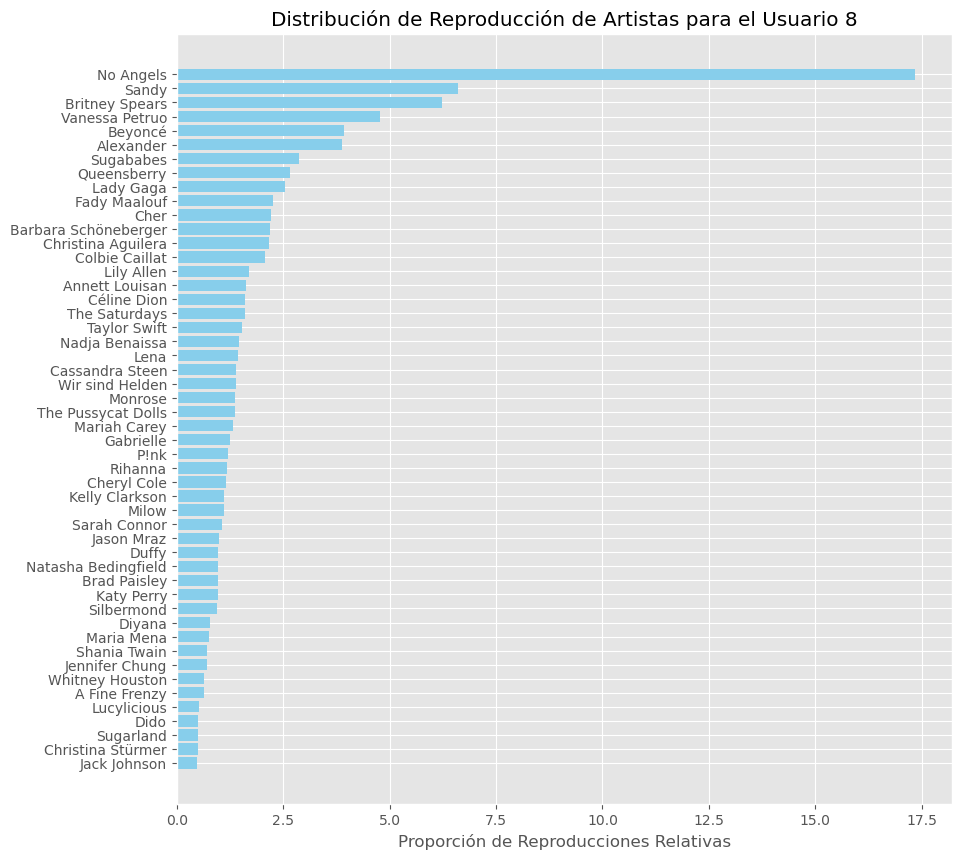

In [7]:
# Usuario con userID == 8
user_8_data = dataset[dataset['userID'] == 8]

# Calcular la distribución de reproducción de artistas basado en el número de reproducciones relativas
user_8_data['reproducciones_relativas'] = user_8_data['nro_reproducciones'] / user_8_data['nro_reproducciones'].sum() * 100
user_8_data = user_8_data.sort_values(by='reproducciones_relativas') 

# Gráfica
plt.figure(figsize=(10, 10))
plt.barh(user_8_data['artist_name'], user_8_data['reproducciones_relativas'], color='skyblue')
plt.xlabel('Proporción de Reproducciones Relativas')
plt.title('Distribución de Reproducción de Artistas para el Usuario 8')
plt.show()

El comportamiento del usuario 8 proporciona valiosas indicaciones para personalizar efectivamente las recomendaciones en un sistema de recomendaciones de música.

Con una alta concentración de reproducciones de unos pocos nombres, especialmente en géneros como pop y R&B, el usuario 8 muestra una clara lealtad hacia un pequeño grupo de artistas. Esto demuestra que el usuario aprecia la comodidad y probablemente busca experiencias musicales consistentes. Como es probable que el usuario 8 disfrute y acepte rápidamente este contenido, el sistema debería priorizar la recomendación de nuevos lanzamientos o canciones populares de estos mismos artistas.

A pesar de tener artistas favoritos, el usuario también muestra interés en explorar una variedad de otros artistas, aunque con menor intensidad. Esto indica que el usuario está dispuesto a conocer nueva música, pero prefiere que esta exploración se ajuste a sus gustos principales. El sistema podría gradualmente incluir recomendaciones de artistas similares o de subgéneros relacionados con el pop y el R&B. Por ejemplo, si una persona escucha mucho pop, podría también disfrutar del pop rock o del indie pop. Las recomendaciones podrían incluir artistas menos conocidos que comparten un estilo con sus favoritos, lo que anima a explorar sin salir demasiado de su zona de confort.

El usuario tiene una preferencia marcada por géneros específicos. Por lo tanto, el sistema de recomendaciones debe dividir las recomendaciones en función de estos géneros predominantes. Mientras tanto, podría ofrecer una mezcla controlada de otros géneros que están fuera de su alcance, como el folk rock o el soul.Los algoritmos de filtrado colaborativo o basado en contenido que tomen en cuenta las preferencias de género del usuario 8 y los patrones de escucha de usuarios similares deberían usarse en el sistema. Esto permitiría recomendar artistas o canciones que sean populares entre oyentes con gustos similares, lo que maximizará la relevancia de las recomendaciones.

El sistema de recomendaciones para el usuario 8 debe ser completamente personalizado y enfocado en ofrecer música de los géneros pop y R&B que los usuarios ya disfrutan, mientras se enfoca en agregar gradualmente nuevas opciones. Esta táctica no solo fortalece su lealtad a ciertos artistas, sino que también facilita una exploración controlada y relevante, manteniendo al usuario comprometido y satisfecho con las recomendaciones ofrecidas.

### 3. Generando Recomendaciones

En esta sección nos interesa generar recomendaciones ***nuevas y relevantes*** para el usuario 8 (`userID==8`). Para ello vamos a generar distintos sistemas de recomendación y comparar las recomendaciones generadas.

#### 3.1. Filtrado colaborativo sencillo: promedios simples.

Usando el promedio simple basado en el número de usuarios que escucha un artista (sin considerar el número de veces que estos usuarios reproducen al artista) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones.

Top 10 recomendaciones de artistas:
artist_name
Lady Gaga             0.322939
Britney Spears        0.275899
Rihanna               0.255814
The Beatles           0.253700
Katy Perry            0.250000
Madonna               0.226744
Avril Lavigne         0.220402
Christina Aguilera    0.215116
Muse                  0.211416
Paramore              0.210888
dtype: float64


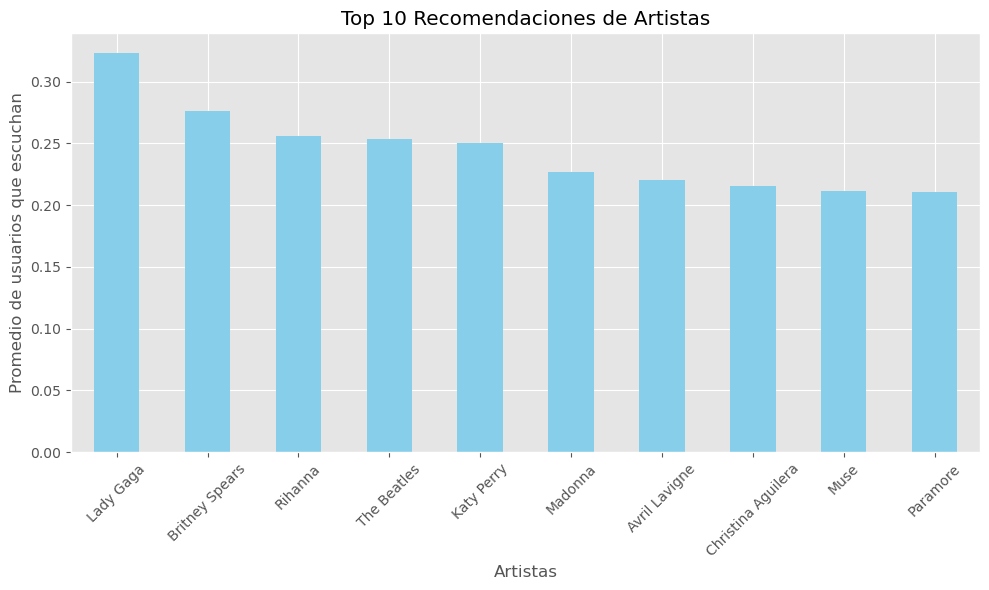

In [8]:
# Creamos la matriz de usuarios y artistas con valores binarios
user_artist_matrix = dataset.pivot_table(index='userID', columns='artist_name', values='nro_reproducciones', aggfunc='size', fill_value=0)

# Calculamos el promedio simple del número de usuarios que escuchan a cada artista
artist_mean_ratings = user_artist_matrix.mean(axis=0)

# Seleccionamos los 10 artistas con el promedio más alto
top_10_artists = artist_mean_ratings.sort_values(ascending=False).head(10)

# Mostramos los resultados
print("Top 10 recomendaciones de artistas:")
print(top_10_artists)

# Generamos una gráfica
plt.figure(figsize=(10, 6))
top_10_artists.plot(kind='bar', color='skyblue')
plt.xlabel('Artistas')
plt.ylabel('Promedio de usuarios que escuchan')
plt.title('Top 10 Recomendaciones de Artistas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Creamos una matriz binaria de usuarios y artistas, donde las filas representan usuarios y las columnas representan artistas, con valores de 1 si el usuario ha escuchado al artista y 0 si no. Calculamos el promedio simple del número de usuarios que escuchan a cada artista y seleccionamos los 10 artistas con el promedio más alto para generar recomendaciones.

Este enfoque nos permite identificar los artistas más populares en términos de la cantidad de usuarios que los escuchan, sin considerar la frecuencia de reproducción. Al calcular el promedio simple, obtenemos una medida clara de la popularidad general de cada artista. Las recomendaciones generadas reflejan los artistas más escuchados por una amplia base de usuarios, lo que es útil para sugerencias generales y populares.


#### 3.2.  Filtrado colaborativo sencillo: promedios ponderados.

Usando el promedio ponderado basado en el número de usuarios que escucha un artista  y ponderando  por el número de veces que estos usuarios reproducen al artista (`nro_reproducciones`) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.


Top 10 recomendaciones de artistas (promedio ponderado):
artist_name
Viking Quest              35323.000000
Tyler Adam                30614.000000
Rytmus                    23462.000000
Johnny Hallyday           16497.500000
Dicky Dixon               15345.000000
RICHARD DIXON-COMPOSER    14082.000000
Thalía                    13462.884615
80kidz                    12520.000000
Tribraco                  10776.000000
Kontrafakt                10726.000000
dtype: float64


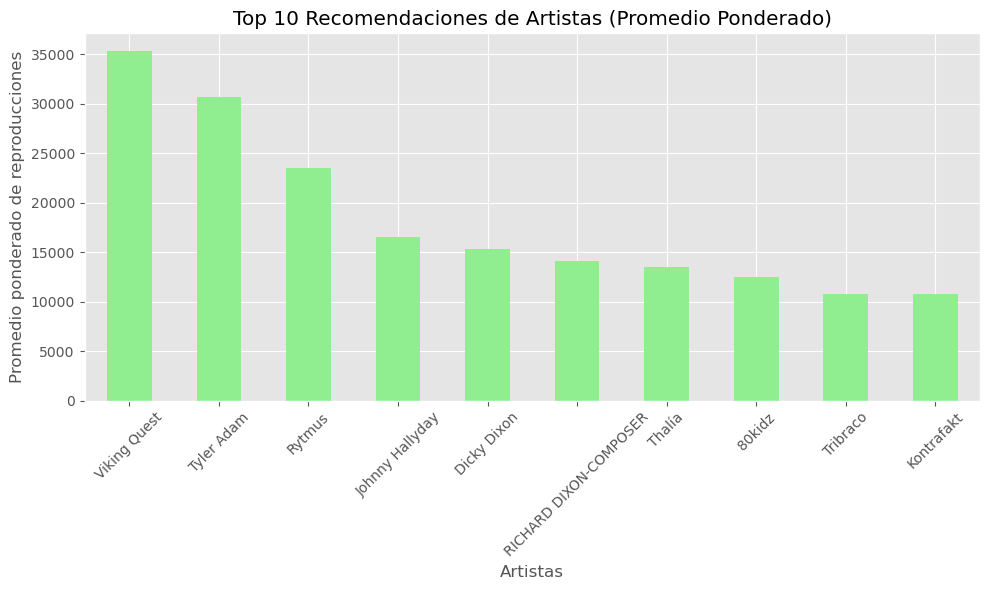

In [13]:
# Creamos la matriz de usuarios y artistas con valores de reproducciones
user_artist_matrix = dataset.pivot_table(index='userID', columns='artist_name', values='nro_reproducciones', aggfunc='sum', fill_value=0)

# Calculamos el promedio ponderado del número de usuarios que escuchan a cada artista
artist_weighted_mean_ratings = user_artist_matrix.sum(axis=0) / (user_artist_matrix != 0).sum(axis=0)

# Seleccionamos los 10 artistas con el promedio ponderado más alto
top_10_weighted_artists = artist_weighted_mean_ratings.sort_values(ascending=False).head(10)

# Mostramos los resultados
print("Top 10 recomendaciones de artistas (promedio ponderado):")
print(top_10_weighted_artists)

# Generamos una gráfica
plt.figure(figsize=(10, 6))
top_10_weighted_artists.plot(kind='bar', color='lightgreen')
plt.xlabel('Artistas')
plt.ylabel('Promedio ponderado de reproducciones')
plt.title('Top 10 Recomendaciones de Artistas (Promedio Ponderado)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Creamos una matriz de usuarios y artistas con los valores correspondientes al número de reproducciones. Calculamos el promedio ponderado del número de usuarios que escuchan a cada artista, ponderando por el número de veces que estos usuarios reproducen al artista. Seleccionamos los 10 artistas con el promedio ponderado más alto y generamos una tabla y una gráfica con estas recomendaciones.

Los resultados muestran que los artistas con los promedios ponderados más altos son Viking Quest, Tyler Adam, Rytmus, Johnny Hallyday, Dicky Dixon, RICHARD DIXON-COMPOSER, Thalía, 80kidz, Tribraco y Kontrafakt. Este enfoque nos permite identificar artistas que no solo son escuchados por muchos usuarios, sino que también tienen un alto número de reproducciones, lo que indica un mayor compromiso de los oyentes. Comparado con el sistema anterior de promedio simple, este método proporciona recomendaciones más precisas y reflejan mejor la intensidad del consumo de los usuarios.


#### 3.3.  Filtrado colaborativo sencillo: similitud de coseno.

Usando el promedio ponderado de reproducciones genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario. Para generar los pesos utilice la distancia de coseno. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.

Top 10 recomendaciones de artistas (promedio ponderado con distancia de coseno):
artist_name
Britney Spears        1728.101377
Lady Gaga              918.223640
Depeche Mode           856.305148
Christina Aguilera     630.453678
Madonna                599.979531
Rihanna                580.867684
Paramore               576.374736
The Beatles            470.447224
Katy Perry             337.867653
Muse                   330.827045
dtype: float64


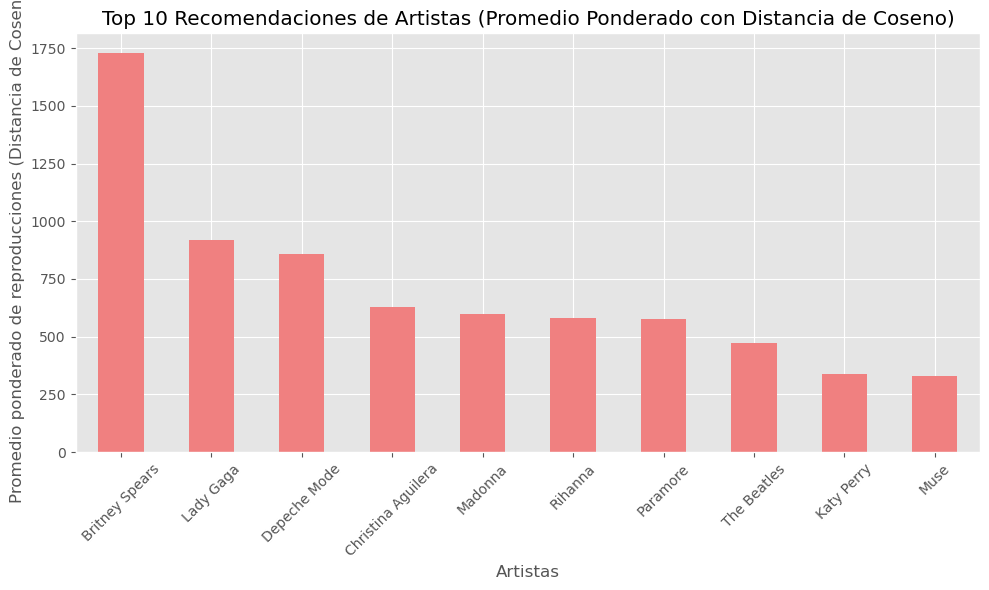

In [16]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Creamos la matriz de usuarios y artistas con valores de reproducciones
user_artist_matrix = dataset.pivot_table(index='userID', columns='artist_name', values='nro_reproducciones', aggfunc='sum', fill_value=0)

# Calculamos la similitud de coseno entre los usuarios
cosine_sim = cosine_similarity(user_artist_matrix)

# Calculamos el promedio ponderado utilizando la distancia de coseno como pesos
weighted_ratings = cosine_sim.dot(user_artist_matrix) / np.array([np.abs(cosine_sim).sum(axis=1)]).T

# Calculamos el promedio ponderado del número de usuarios que escuchan a cada artista
artist_weighted_mean_ratings_cosine = pd.Series(weighted_ratings.mean(axis=0), index=user_artist_matrix.columns)

# Seleccionamos los 10 artistas con el promedio ponderado más alto
top_10_weighted_artists_cosine = artist_weighted_mean_ratings_cosine.sort_values(ascending=False).head(10)

# Mostramos los resultados
print("Top 10 recomendaciones de artistas (promedio ponderado con distancia de coseno):")
print(top_10_weighted_artists_cosine)

# Generamos una gráfica
plt.figure(figsize=(10, 6))
top_10_weighted_artists_cosine.plot(kind='bar', color='lightcoral')
plt.xlabel('Artistas')
plt.ylabel('Promedio ponderado de reproducciones (Distancia de Coseno)')
plt.title('Top 10 Recomendaciones de Artistas (Promedio Ponderado con Distancia de Coseno)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Creamos una matriz de usuarios y artistas con los valores correspondientes al número de reproducciones. Calculamos la similitud de coseno entre los usuarios para obtener los pesos. Utilizamos la similitud de coseno como pesos para calcular el promedio ponderado del número de usuarios que escuchan a cada artista. Seleccionamos los 10 artistas con el promedio ponderado más alto y generamos una tabla y una gráfica con estas recomendaciones.

Los resultados muestran que los artistas con los promedios ponderados más altos utilizando la distancia de coseno son Britney Spears, Lady Gaga, Depeche Mode, Christina Aguilera, Madonna, Rihanna, Paramore, The Beatles, Katy Perry y Muse. Estos artistas no solo son populares entre muchos usuarios, sino que también tienen un alto número de reproducciones, lo que indica un mayor compromiso de los oyentes. La distancia de coseno nos permite identificar artistas que son populares entre usuarios con patrones de escucha similares, proporcionando recomendaciones más personalizadas y relevantes.

En comparación con el sistema anterior de promedio ponderado simple, el sistema de promedio ponderado con distancia de coseno tiene en cuenta la similitud entre los usuarios. Mientras que el promedio ponderado simple se enfoca en la popularidad general y la intensidad del consumo, la distancia de coseno añade personalización al considerar qué tan similares son los hábitos de escucha de los usuarios. Esto resulta en recomendaciones más precisas y adaptadas a las preferencias individuales de los usuarios.

#### 3.4.  Filtrado colaborativo usando SVD


Usando la descomposición en valores singulares (SVD) genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores.


Top 10 recomendaciones de artistas (SVD):
artist_name
Britney Spears        1282.380574
Lady Gaga              732.369166
Depeche Mode           692.994899
Rihanna                555.200347
Christina Aguilera     541.512443
Paramore               539.475725
Madonna                455.709031
Shakira                359.055603
Pink Floyd             325.550901
Miley Cyrus            322.856748
dtype: float64


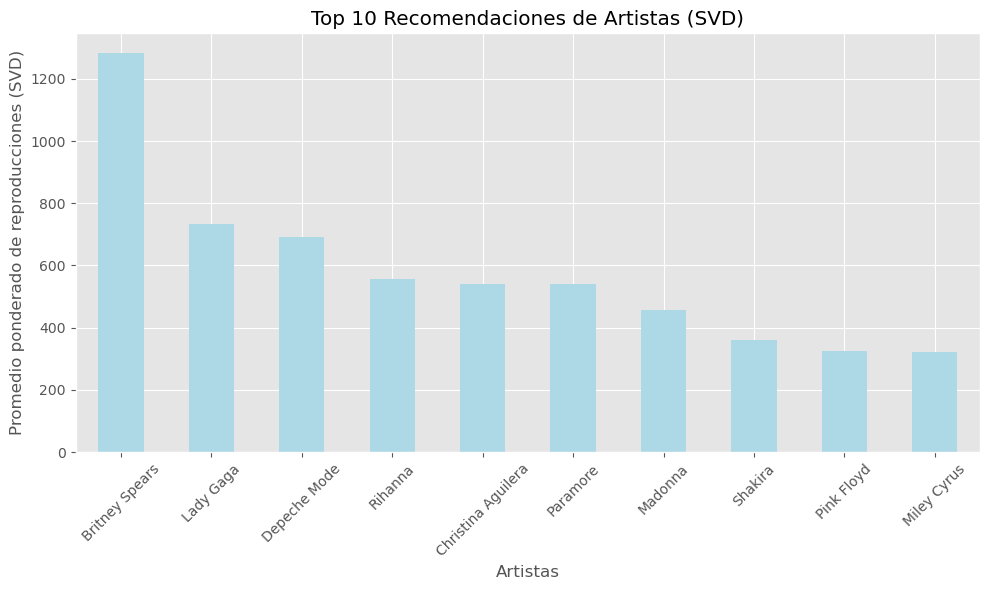

In [17]:
from sklearn.decomposition import TruncatedSVD

# Creamos la matriz de usuarios y artistas con valores de reproducciones
user_artist_matrix = dataset.pivot_table(index='userID', columns='artist_name', values='nro_reproducciones', aggfunc='sum', fill_value=0)

# Aplicamos SVD
svd = TruncatedSVD(n_components=20)
matrix_svd = svd.fit_transform(user_artist_matrix)

# Reconstruimos la matriz aproximada
approx_matrix = np.dot(matrix_svd, svd.components_)

# Calculamos el promedio ponderado del número de usuarios que escuchan a cada artista
artist_weighted_mean_ratings_svd = pd.Series(approx_matrix.mean(axis=0), index=user_artist_matrix.columns)

# Seleccionamos los 10 artistas con el promedio ponderado más alto
top_10_weighted_artists_svd = artist_weighted_mean_ratings_svd.sort_values(ascending=False).head(10)

# Mostramos los resultados
print("Top 10 recomendaciones de artistas (SVD):")
print(top_10_weighted_artists_svd)

# Generamos una gráfica
plt.figure(figsize=(10, 6))
top_10_weighted_artists_svd.plot(kind='bar', color='lightblue')
plt.xlabel('Artistas')
plt.ylabel('Promedio ponderado de reproducciones (SVD)')
plt.title('Top 10 Recomendaciones de Artistas (SVD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Creamos una matriz de usuarios y artistas con los valores correspondientes al número de reproducciones. Aplicamos la descomposición en valores singulares (SVD) para reducir la dimensionalidad de la matriz y capturar las características más importantes. Reconstruimos una matriz aproximada utilizando los componentes principales obtenidos de SVD y calculamos el promedio ponderado del número de usuarios que escuchan a cada artista. Seleccionamos los 10 artistas con el promedio ponderado más alto y generamos una tabla y una gráfica con estas recomendaciones.

Los resultados muestran que los artistas con los promedios ponderados más altos utilizando SVD son Britney Spears, Lady Gaga, Depeche Mode, Rihanna, Christina Aguilera, Paramore, Madonna, Shakira, Pink Floyd y Miley Cyrus. Estos artistas no solo son populares entre muchos usuarios, sino que también tienen un alto número de reproducciones, lo que indica un mayor compromiso de los oyentes. La aplicación de SVD permite capturar las relaciones más significativas entre usuarios y artistas, proporcionando recomendaciones más precisas.

En comparación con los sistemas anteriores, el uso de SVD añade una capa de reducción de dimensionalidad que mejora la eficiencia y precisión de las recomendaciones. Mientras que el promedio ponderado simple y la distancia de coseno se enfocan en la popularidad general y la similitud entre usuarios, respectivamente, SVD captura las características más importantes y elimina el ruido, proporcionando recomendaciones más precisas. Las recomendaciones basadas en SVD capturan mejor las conexiones entre usuarios y artistas, lo que hace que las sugerencias sean más precisas y adaptadas a los gustos individuales.

#### 3.5.  Filtrado colaborativo usando Análisis de Canasta de Compra

Usando  el algoritmo `Apriori` genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores. Esto puede tomar mucho tiempo, sea cuidadoso al elegir los hiper-parámetors del modelo, utilice los resultados de las estadísticas descriptivas para elegir sus hiper-parámetros, y genere solo reglas con 2 elementos. (Puede también aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


c:\Users\joseh\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Top 10 recomendaciones de artistas (Apriori):
                    antecedents                 consequents   support  \
96                (Hilary Duff)            (Ashley Tisdale)  0.052854   
97             (Ashley Tisdale)               (Hilary Duff)  0.052854   
790               (Miley Cyrus)  (Selena Gomez & the Scene)  0.065539   
791  (Selena Gomez & the Scene)               (Miley Cyrus)  0.065539   
728               (Leona Lewis)              (Mariah Carey)  0.058140   
729              (Mariah Carey)               (Leona Lewis)  0.058140   
441               (Miley Cyrus)               (Demi Lovato)  0.053911   
440               (Demi Lovato)               (Miley Cyrus)  0.053911   
109            (Ashley Tisdale)               (Miley Cyrus)  0.074524   
108               (Miley Cyrus)            (Ashley Tisdale)  0.074524   

     confidence      lift  
96     0.591716  6.151245  
97     0.549451  6.151245  
790    0.433566  5.736417  
791    0.867133  5.736417  
728    0.6

<Figure size 1000x600 with 0 Axes>

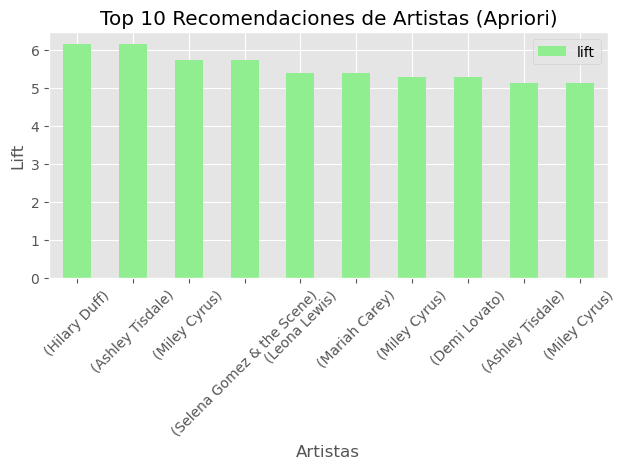

In [19]:
from mlxtend.frequent_patterns import apriori, association_rules

# Creamos la matriz de usuarios y artistas con valores binarios
user_artist_matrix = dataset.pivot_table(index='userID', columns='artist_name', values='nro_reproducciones', aggfunc='size', fill_value=0)
user_artist_matrix = user_artist_matrix.applymap(lambda x: 1 if x > 0 else 0)

# Aplicamos el algoritmo Apriori con ajustes
frequent_itemsets = apriori(user_artist_matrix, min_support=0.05, use_colnames=True, low_memory=True)

# Generamos reglas de asociación
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules[rules['antecedents'].apply(lambda x: len(x) == 1) & rules['consequents'].apply(lambda x: len(x) == 1)]

# Seleccionamos las 10 reglas con el mayor lift
top_10_rules = rules.sort_values(by='lift', ascending=False).head(10)

# Mostramos los resultados
print("Top 10 recomendaciones de artistas (Apriori):")
print(top_10_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Generamos una gráfica
plt.figure(figsize=(10, 6))
top_10_rules.plot(kind='bar', x='antecedents', y='lift', color='lightgreen')
plt.xlabel('Artistas')
plt.ylabel('Lift')
plt.title('Top 10 Recomendaciones de Artistas (Apriori)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# Graficamos la tabla top_10_rules
top_10_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
96,(Hilary Duff),(Ashley Tisdale),0.089323,0.096195,0.052854,0.591716,6.151245,0.044262,2.213669,0.919571
97,(Ashley Tisdale),(Hilary Duff),0.096195,0.089323,0.052854,0.549451,6.151245,0.044262,2.021258,0.926561
790,(Miley Cyrus),(Selena Gomez & the Scene),0.151163,0.075581,0.065539,0.433566,5.736417,0.054114,1.631998,0.972713
791,(Selena Gomez & the Scene),(Miley Cyrus),0.075581,0.151163,0.065539,0.867133,5.736417,0.054114,6.388617,0.893183
728,(Leona Lewis),(Mariah Carey),0.084567,0.127378,0.058140,0.687500,5.397303,0.047368,2.792389,0.889985
729,(Mariah Carey),(Leona Lewis),0.127378,0.084567,0.058140,0.456432,5.397303,0.047368,1.684118,0.933649
441,(Miley Cyrus),(Demi Lovato),0.151163,0.067653,0.053911,0.356643,5.271635,0.043685,1.449191,0.954607
440,(Demi Lovato),(Miley Cyrus),0.067653,0.151163,0.053911,0.796875,5.271635,0.043685,4.178891,0.869103
109,(Ashley Tisdale),(Miley Cyrus),0.096195,0.151163,0.074524,0.774725,5.125106,0.059983,3.768009,0.890548
108,(Miley Cyrus),(Ashley Tisdale),0.151163,0.096195,0.074524,0.493007,5.125106,0.059983,1.782678,0.948217


Creamos una matriz binaria de usuarios y artistas. Aplicamos el algoritmo Apriori con un valor ajustado de min_support y el parámetro low_memory para reducir el uso de memoria. Generamos reglas de asociación y seleccionamos las 10 reglas con el mayor valor de lift para generar recomendaciones.

El análisis de las reglas de asociación generadas por el algoritmo Apriori revela fuertes relaciones entre varios artistas. Por ejemplo, Hilary Duff y Ashley Tisdale tienen una alta confianza (0.591 y 0.549 respectivamente) y un elevado lift (6.151), indicando que los usuarios que escuchan a uno de estos artistas también tienden a escuchar al otro. Similarmente, Miley Cyrus muestra fuertes asociaciones con Selena Gomez & the Scene y Demi Lovato, con altos valores de confianza y lift, sugiriendo patrones de escucha comunes entre estos artistas. Leona Lewis y Mariah Carey también presentan una asociación significativa. Estos resultados destacan patrones de escucha que pueden ser utilizados para hacer recomendaciones precisas basadas en las asociaciones más fuertes entre artistas.

En comparación con los sistemas anteriores, el uso del algoritmo Apriori se enfoca en identificar asociaciones frecuentes entre artistas escuchados por los usuarios. Mientras que los métodos anteriores se basan en la popularidad general, la intensidad del consumo y la similitud entre usuarios, Apriori se centra en encontrar patrones de escucha comunes y asociaciones entre artistas. Esto puede proporcionar recomendaciones basadas en las relaciones entre artistas, lo que puede ser útil para descubrir nuevos artistas relacionados con los gustos del usuario.

### 4. Recomendaciones generales 

De acuerdo con los resultados encontrados, en su opinión ¿qué procedimiento generó las mejores recomendaciones para este usuario? ¿Cómo implementaría una evaluación objetiva de estas recomendaciones? Justifique su respuesta.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).